In [2]:
import tensorflow as tf
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


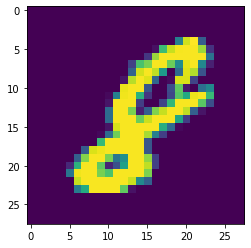

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[np.random.randint(0, x_train.shape[0]+1)])

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test, num_classes = 10)

In [6]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [7]:
input_shape = x_train.shape[1:]
epochs = 10
batch_size = 128

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
          
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [10]:
model.compile(optimizer = Adam(), loss = categorical_crossentropy, metrics = ['accuracy'])

In [11]:
model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1, 
          validation_data = (x_test, y_test),
          shuffle = True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.3559 - accuracy: 0.8978 - val_loss: 0.1197 - val_accuracy: 0.9630
Epoch 2/10
60000/60000 [==============================] - 270s 5ms/step - loss: 0.0944 - accuracy: 0.9719 - val_loss: 0.0421 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 269s 4ms/step - loss: 0.0741 - accuracy: 0.9784 - val_loss: 0.0315 - val_accuracy: 0.9904
Epoch 4/10
60000/60000 [==============================] - 329s 5ms/step - loss: 0.0631 - accuracy: 0.9811 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 5/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 6/10
60000/60000 [==============================] - 319s 5ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0220 - val_accuracy: 0.9935
Epoch 7/10
60000/60000 [==============================] - 309s

In [12]:
mnist_json = model.to_json()
with open("mnist.json", "w") as json_file:
    json_file.write(mnist_json)
model.save_weights('mnist.h5')

In [13]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test accuracy:", score[1])

Test accuracy: 0.9933000206947327
